# Supervised Mode Recognition in Multi-Cultural Context

## STEP 1 : Experiments on OTMM Dataset

 - Set your Dunya token to have access for Dunya datasets.
 
 - Set 
 
       EXTRACT_FEATURES = True
   for extracting features for the first time.    

In [1]:
import os
import modeUtils.Containers as C
import modeUtils.utils as U

DUNYA_TOKEN = '___Enter Your Dunya User Token Here____'

# If you would like to skip feature extraction and perform classification 
# with default parameters, set ' EXTRACT_FEATURES = False '. 
EXTRACT_FEATURES = False

### Set analysis parameters

 - AnalysisParams : class type object for analysis parameters
 
 - You can :
 
     - change the windowing parameters
 
     - change the chroma resolution using 'chroma_NumBins'
      
     - choose which features to use (local or global)
     
     - adjust the part of song to extract features (0 is beginning and 1 is full song)

In [2]:
WindowSize = 200 #ms
HopSize = 100 #ms
WindowFunction = 'hann' # 'Hanning'
fftN = 2048
sampleRate = 44100
chroma_NumBins = 48
Features_Region = ['local','full']
LocalRegion = 0.3 # 30% from the beginning of the whole song
parameters = C.AnalysisParams(WindowSize,
                              HopSize,
                              WindowFunction,
                              fftN,
                              sampleRate,
                              chroma_NumBins,
                              Features_Region,
                              LocalRegion)

### Download Dataset

 - Initiate Collection class type object for Ottoman Turkish Makam Music Dataset and set parameters for analysis.

In [3]:
dataset = C.Collection()
dataset.set_dunya_token(DUNYA_TOKEN)
dataset.set_parameters(parameters)

 - Download dataset using Dunya API to the directory below.
 - Use 
 
       Collection.download_collection('annotations.json') 
   method automatically downloads the songs in the annotation file and parses related information for further processing into Recording class type objects.

In [4]:
annotationFile = 'data/Turkish/annotations.json'
dataset.download_collection(annotationFile)

Dataset downloaded and created in data/Turkish/ folder


True

 - To see the attributes of each recording, use 
 
       Collection.get_recording('song_MBID')
   method

In [5]:
rec = dataset.get_recording('4b31c6ab-c401-42d7-af85-a330aef806d3')

### Feature Extraction

   - Features are extracted and saved within Container object. The Recording features and metadata are stored in Container.recordings attribute, which is a dictionary of Recording objects.

In [6]:
if EXTRACT_FEATURES:
    dataset.extract_chroma_features()
else:
    FeaturesData = os.path.join(dataset.path, 
                                'extractedFeatures_for' + dataset.mode + 
                                'tradition(' + str(dataset.analysis_parameters.numbins) + 'bins).pkl') 
    dataset.load_features(FeaturesData)
    
if 'local' in Features_Region:
    dataset.extract_local_chroma_features()         

### Feature Selection

  - Manually select which chunk of features to use.

In [7]:
Features4Classification = ['chroma_std','chroma_std_local']

### Automatic Classification 
 - Initiate SupervisedLearning object for performing the automatic classification.
 - Create a .csv files containing features for classification for the purpose of rapid experimentation.

In [8]:
ModeRecognition = C.SupervisedLearning()
ModeRecognition.feature_selection(Features4Classification)
ModeRecognition.create_dataframe(dataset)
ModeRecognition.read_dataframe(dataset)

 - Apply automatic classification with Support Vector Machines as classifiers.
 - The classifier model parameters are optimized using Grid Search Method, which are validated using 10-fold cross validation.

In [9]:
ModeRecognition.evaluate_classifier()

 - Print out the standard evalution scores.

In [10]:
ModeRecognition.scores_accuracy

(0.73999999999999999, 0.036619666847201117)

In [11]:
ModeRecognition.scores_fMeasure

(0.73999999999999999, 0.036098990004314151)

Confusion matrix, without normalization


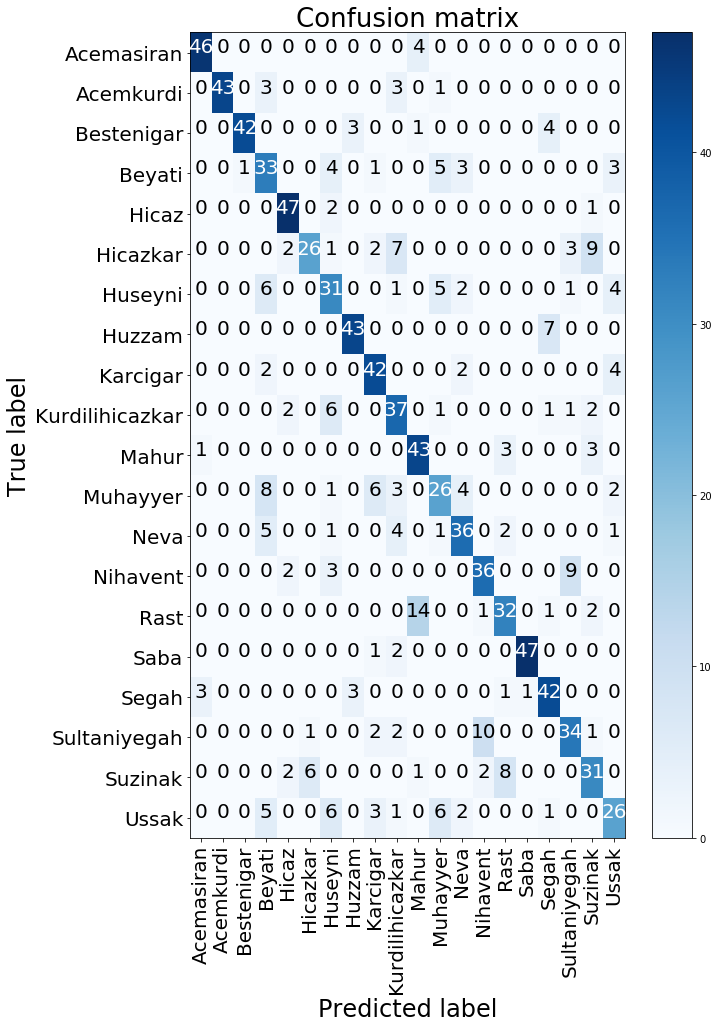

In [12]:
U.plot_confusion_matrix(ModeRecognition.confusion_matrix,ModeRecognition.classTypes)

## STEP 2 : Mode Recognition on Single Audio File

 Procedure : 
 
  - Train the classifier with the whole dataset.
  
  - Extract features of the audio file for mode recognition.
  
  - Predict the mode type using the trained classifier.

In [13]:
ModeRecognition.train_model()

- Initiate Recording object for the song to estimate mode type.

In [48]:
NewSong = C.Recording()
NewSong.load_recording('omrumuzunsondemi.mp3',parameters)

U.DetectTonicLastNote(NewSong)

 - Predict the mode type using the classifier that is trained on the Dunya dataset.

In [49]:
predictedModeType = ModeRecognition.predict_mode_recording(NewSong,parameters)

- Print out the predicted Mode Type

In [50]:
predictedModeType

array(['Huzzam'], dtype=object)

In [17]:
#NewSong.tonic 